### Load iris dataset

In [1]:
from sklearn import svm, datasets
iris= datasets.load_iris()

In [2]:
import pandas as pd
df =  pd.DataFrame(iris.data,columns = iris.feature_names)
df['flower'] = iris.target
df['flower_names'] = df['flower'].apply(lambda x : iris.target_names[x])
df[45:55]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower,flower_names
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


### Approach 1: Use train_train_split and manually tune parameters by trial and error

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size = 0.3)

In [4]:
model = svm.SVC(kernel = 'rbf',C = 30,gamma = 'auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9555555555555556

### Approach 2 : Use K Fold Cross validation

In [11]:
 from sklearn.model_selection import cross_val_score
 import numpy as np

In [7]:
cross_val_score(svm.SVC(kernel = 'linear',C  =10,gamma = 'auto'),iris.data,iris.target,cv =5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [8]:
cross_val_score(svm.SVC(kernel = 'rbf',C  =10,gamma = 'auto'),iris.data,iris.target,cv =5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [9]:
cross_val_score(svm.SVC(kernel = 'rbf',C  =20,gamma = 'auto'),iris.data,iris.target,cv =5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

#### Above approach is tiresome and very manual . we can use for loop as an alternative

In [12]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel = kval,C = cval,gamma = 'auto'),iris.data,iris.target,cv = 5)
        avg_scores[kval + '_' + str(cval)] = np.average(cv_scores)

        
        
avg_scores

{'rbf_1': 0.9800000000000001,
 'rbf_10': 0.9800000000000001,
 'rbf_20': 0.9666666666666668,
 'linear_1': 0.9800000000000001,
 'linear_10': 0.9733333333333334,
 'linear_20': 0.9666666666666666}

# Approach 3: Use GridSearchCV


#### GridSearchCV does exactly same thing as for loop above but in a single line of code

In [13]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(svm.SVC(gamma = 'auto'),{
    'C':[1,10,20],
    'kernel':['rbf','linear']
},cv = 5,return_train_score = False)
clf.fit(iris.data,iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00350394, 0.00270395, 0.00290427, 0.00330367, 0.00310516,
        0.00250344]),
 'std_fit_time': array([0.00054864, 0.00060147, 0.00037598, 0.00050921, 0.00049086,
        0.00031598]),
 'mean_score_time': array([0.0019033 , 0.00160294, 0.00180302, 0.00200505, 0.00150232,
        0.00110235]),
 'std_score_time': array([3.74801347e-04, 2.01441797e-04, 4.00352677e-04, 3.17346231e-04,
        2.33601546e-07, 2.01393606e-04]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20

In [15]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003504,0.000549,0.001903,3.748013e-04,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.002704,0.000601,0.001603,2.014418e-04,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.002904,0.000376,0.001803,4.003527e-04,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.003304,0.000509,0.002005,3.173462e-04,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.003105,0.000491,0.001502,2.336015e-07,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.002503,0.000316,0.001102,2.013936e-04,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [16]:
df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [18]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [19]:
clf.best_score_

0.9800000000000001

In [20]:
dir(clf)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_is_fitted',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_estimator_type',
 '_format_results',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_pairwise',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run_search',
 '_validate_data',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'get_params',
 'inverse_transform',
 'multimetric_',
 'n_features_in_',
 'n_jobs',
 'n_splits

In [22]:
clf.best_estimator_

SVC(C=1, gamma='auto')

### RandomizedSearchCV




In [23]:
from sklearn.model_selection import RandomizedSearchCV


In [24]:
rs = RandomizedSearchCV(svm.SVC(gamma = 'auto'), {
    'C' :[1,10,20],
    'kernel':['rbf','linear']
},
cv = 5,
return_train_score = False,
n_iter = 2
)
rs.fit(iris.data,iris.target)
rs.cv_results_

{'mean_fit_time': array([0.00280461, 0.00310564]),
 'std_fit_time': array([0.00112204, 0.00037532]),
 'mean_score_time': array([0.00160246, 0.00200386]),
 'std_score_time': array([0.00020168, 0.00031674]),
 'param_kernel': masked_array(data=['linear', 'rbf'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 10],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'C': 1}, {'kernel': 'rbf', 'C': 10}],
 'split0_test_score': array([0.96666667, 0.96666667]),
 'split1_test_score': array([1., 1.]),
 'split2_test_score': array([0.96666667, 0.96666667]),
 'split3_test_score': array([0.96666667, 0.96666667]),
 'split4_test_score': array([1., 1.]),
 'mean_test_score': array([0.98, 0.98]),
 'std_test_score': array([0.01632993, 0.01632993]),
 'rank_test_score': array([1, 1])}

In [27]:
df = pd.DataFrame(rs.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002805,0.001122,0.001602,0.000202,linear,1,"{'kernel': 'linear', 'C': 1}",0.966667,1.0,0.966667,0.966667,1.0,0.98,0.01633,1
1,0.003106,0.000375,0.002004,0.000317,rbf,10,"{'kernel': 'rbf', 'C': 10}",0.966667,1.0,0.966667,0.966667,1.0,0.98,0.01633,1


#### How about different models with different hyperparameters ?

In [29]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm':{
        'model': svm.SVC(gamma = 'auto'),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params': {
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params': {
            'C':[1,5,10]
        }
    }
}

In [31]:
scores = []

for model_name,mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'],cv =5,return_train_score = False)
    clf.fit(iris.data,iris.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 5}


## Exercise 

In [32]:
from sklearn.datasets import load_digits

In [34]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [36]:
df = pd.DataFrame(digits.data,columns = digits.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [37]:
df['target'] = digits.target

In [40]:
df['target_names'] = df.target.apply(lambda x : digits.target_names[x])

In [41]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target,target_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4


In [42]:
import matplotlib.pyplot as plt

%matplotlib inline

<Figure size 432x288 with 0 Axes>

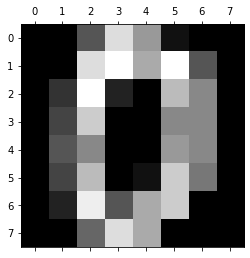

In [51]:


plt.gray()
plt.matshow(digits.images[0]) 
plt.show()


In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [53]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma = 'auto'),
        'params': {
            'C':[1,10,20],
            'kernel': ['rbf','linear']
        }
        
    },
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators':[1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params' : {
            'C' : [1,5,10]
        }
    },
    'naive_bayes_gaussian' : {
        'model' : GaussianNB(),
        'params' : {}
    },
    'naive_bayes_gaussian' : {
        'model' : MultinomialNB(),
        'params' : {}
    },
    'decision_tree' : {
        'model' : DecisionTreeClassifier(),
        'params' : {
            'criterion':['gini','entropy']
        }
    }
}

In [57]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score = False)
    clf.fit(digits.data,digits.target)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })
    
df = pd.DataFrame(scores,columns = ['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.907089,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.870350,{}
4,decision_tree,0.807482,{'criterion': 'entropy'}
